## This Notebook is Dedicated to EDA on the HNHH processed data set

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Setting plot styles ahead
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create directory for saving plots
plots_dir = '../../plots'
os.makedirs(plots_dir, exist_ok=True)

# Load my data
df = pd.read_csv('../../data/hnhh_enriched.csv')


print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nPlots will be saved to: {plots_dir}")

Dataset shape: (992, 32)
Columns: ['url', 'publishDate', 'uniqueUsers', 'pageViewsTotal', 'totalEngagementTime', 'totalDuration', 'discoverImpressions', 'googleNewsImpressions', 'searchImpressions', 'searchClicks', 'discoverClicks', 'googleNewsClicks', 'searchClicksPerArticle', 'searchImpressionsPerArticle', 'discoverClicksPerArticle', 'googleNewsClicksPerArticle', 'googleNewsImpressionsPerArticle', 'averageScroll', 'averageDurationPerUser', 'averageRFV', 'cumulativeRFV', 'averageDurationPerPage', 'averageEngagementTimePerUser', 'averageEngagementTimePerPage', 'pageViewsPerUser', 'searchPosition', 'searchCTR', 'discoverCTR', 'googleNewsPosition', 'googleNewsCTR', 'text', 'meta_description']

Plots will be saved to: ../../plots


In [36]:
# Ensure publishDate is datetime
df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')

print("\n1. DATASET OVERVIEW")
print(f"   • Total articles analyzed: {len(df):,}")
print(f"   • Date range: {df['publishDate'].min().strftime('%Y-%m-%d')} to {df['publishDate'].max().strftime('%Y-%m-%d')}")
print(f"   • Total metrics tracked: {len(df.columns)}")

print("\n2. ENGAGEMENT METRICS")
print(f"   • Total unique users: {df['uniqueUsers'].sum():,.0f}")
print(f"   • Total page views: {df['pageViewsTotal'].sum():,.0f}")
print(f"   • Average engagement time per article: {df['totalEngagementTime'].mean():.2f}")
print(f"   • Average scroll depth: {df['averageScroll'].mean() * 100:.1f}%")

print("\n3. TRAFFIC SOURCES")
search_clicks = df['searchClicks'].sum()
discover_clicks = df['discoverClicks'].sum()
news_clicks = df['googleNewsClicks'].sum()
total_clicks = search_clicks + discover_clicks + news_clicks
print(f"   • Search: {search_clicks:,.0f} clicks ({search_clicks/total_clicks*100:.1f}%)")
print(f"   • Discover: {discover_clicks:,.0f} clicks ({discover_clicks/total_clicks*100:.1f}%)")
print(f"   • Google News: {news_clicks:,.0f} clicks ({news_clicks/total_clicks*100:.1f}%)")

print("\n4. CONTENT CHARACTERISTICS")
if 'text_word_count' in df.columns:
    print(f"   • Average article length: {df['text_word_count'].mean():.0f} words")
    print(f"   • Shortest article: {df['text_word_count'].min():.0f} words")
    print(f"   • Longest article: {df['text_word_count'].max():.0f} words")

print("\n5. PERFORMANCE")
print(f"   • Average users per article: {df['uniqueUsers'].mean():.0f}")
print(f"   • Average page views per article: {df['pageViewsTotal'].mean():.0f}")
print(f"   • Average search CTR: {df['searchCTR'].mean() * 100:.2f}%")

print("\n" + "=" * 80)


1. DATASET OVERVIEW
   • Total articles analyzed: 992
   • Date range: 2025-04-17 to 2025-11-30
   • Total metrics tracked: 32

2. ENGAGEMENT METRICS
   • Total unique users: 2,221,655
   • Total page views: 2,470,567
   • Average engagement time per article: 60829.19
   • Average scroll depth: 5298.9%

3. TRAFFIC SOURCES
   • Search: 159,839 clicks (7.5%)
   • Discover: 1,953,664 clicks (92.1%)
   • Google News: 7,596 clicks (0.4%)

4. CONTENT CHARACTERISTICS

5. PERFORMANCE
   • Average users per article: 2240
   • Average page views per article: 2490
   • Average search CTR: 163.40%



## Key Insights Summary

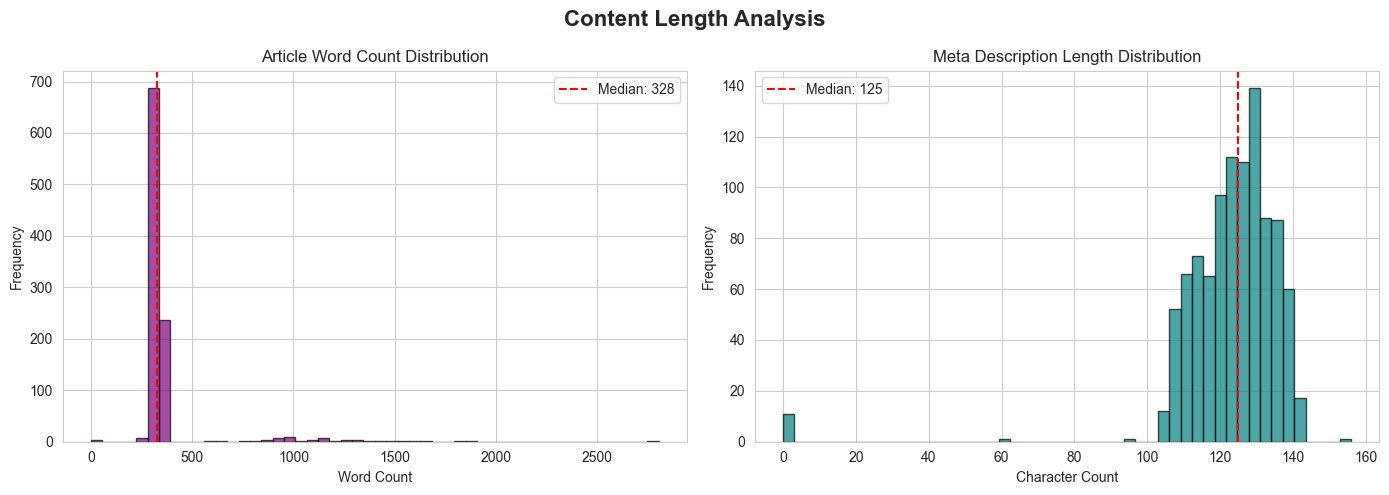


Content Length Statistics:
------------------------------------------------------------
Article word count - Mean: 373, Median: 328
Description length - Mean: 123, Median: 125

✓ Plot saved: ../../plots/content_length_analysis.png


In [37]:
# Text length analysis
if 'text' in df.columns:
    df['text_length'] = df['text'].fillna('').astype(str).apply(len)
    df['text_word_count'] = df['text'].fillna('').astype(str).apply(lambda x: len(x.split()))
    
if 'meta_description' in df.columns:
    df['description_length'] = df['meta_description'].fillna('').astype(str).apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Content Length Analysis', fontsize=16, fontweight='bold')

# Text length distribution
if 'text_word_count' in df.columns:
    axes[0].hist(df['text_word_count'], bins=50, edgecolor='black', alpha=0.7, color='purple')
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Article Word Count Distribution')
    axes[0].axvline(df['text_word_count'].median(), color='red', linestyle='--', 
                   label=f'Median: {df["text_word_count"].median():.0f}')
    axes[0].legend()

# Description length distribution
if 'description_length' in df.columns:
    axes[1].hist(df['description_length'], bins=50, edgecolor='black', alpha=0.7, color='teal')
    axes[1].set_xlabel('Character Count')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Meta Description Length Distribution')
    axes[1].axvline(df['description_length'].median(), color='red', linestyle='--', 
                   label=f'Median: {df["description_length"].median():.0f}')
    axes[1].legend()

plt.tight_layout()
plt.savefig(f'{plots_dir}/content_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\nContent Length Statistics:")
print("-" * 60)
if 'text_word_count' in df.columns:
    print(f"Article word count - Mean: {df['text_word_count'].mean():.0f}, Median: {df['text_word_count'].median():.0f}")
if 'description_length' in df.columns:
    print(f"Description length - Mean: {df['description_length'].mean():.0f}, Median: {df['description_length'].median():.0f}")
print(f"\n✓ Plot saved: {plots_dir}/content_length_analysis.png")

# Correlation Matrix

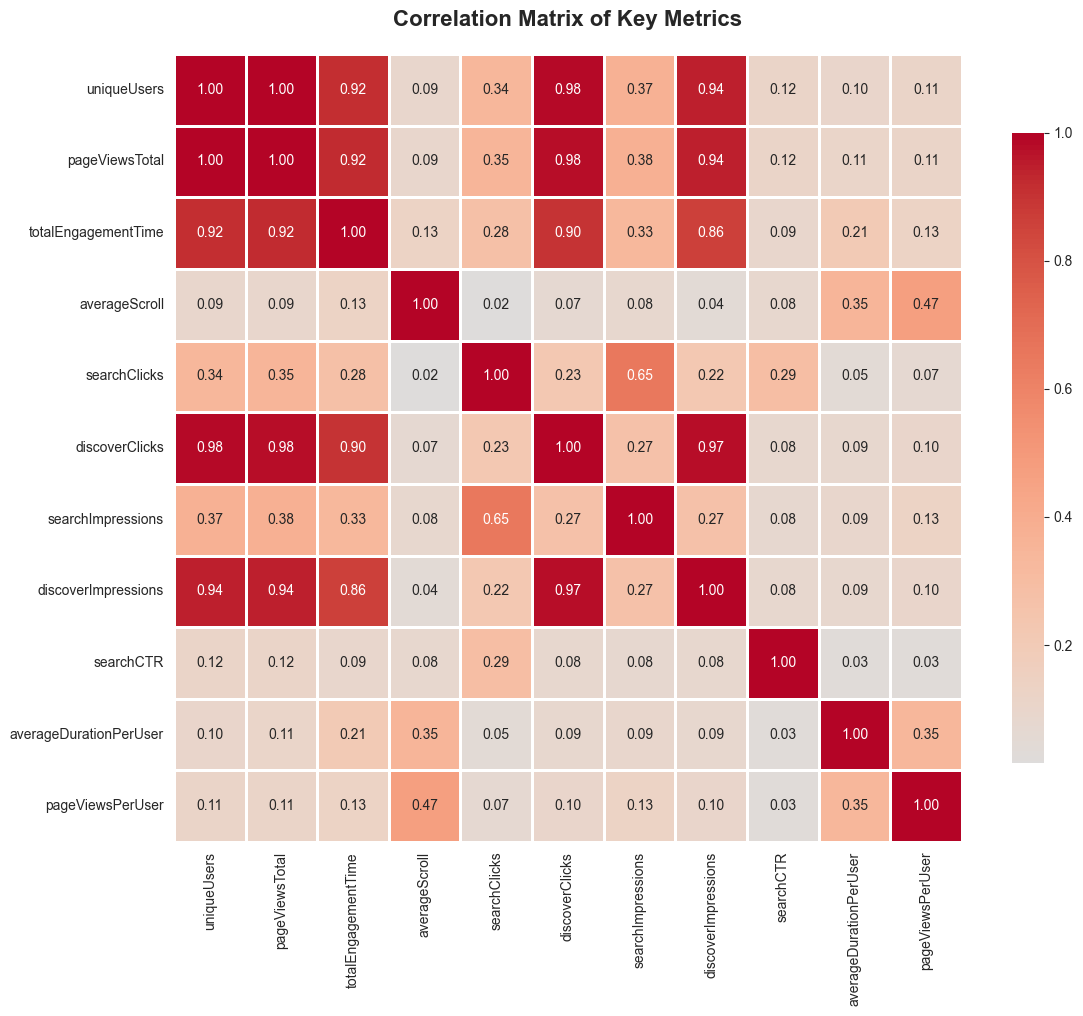


Strongest Positive Correlations (> 0.7):
------------------------------------------------------------
uniqueUsers                    <-> pageViewsTotal                 : 1.000
uniqueUsers                    <-> totalEngagementTime            : 0.918
uniqueUsers                    <-> discoverClicks                 : 0.981
uniqueUsers                    <-> discoverImpressions            : 0.944
pageViewsTotal                 <-> totalEngagementTime            : 0.923
pageViewsTotal                 <-> discoverClicks                 : 0.980
pageViewsTotal                 <-> discoverImpressions            : 0.944
totalEngagementTime            <-> discoverClicks                 : 0.898
totalEngagementTime            <-> discoverImpressions            : 0.861
discoverClicks                 <-> discoverImpressions            : 0.974


In [38]:
# Correlation matrix of key metrics
key_metrics = [
    'uniqueUsers', 'pageViewsTotal', 'totalEngagementTime', 
    'averageScroll', 'searchClicks', 'discoverClicks', 
    'searchImpressions', 'discoverImpressions', 'searchCTR', 
    'averageDurationPerUser', 'pageViewsPerUser'
]

# Filter to only existing columns
available_metrics = [col for col in key_metrics if col in df.columns]
corr_matrix = df[available_metrics].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Metrics', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\nStrongest Positive Correlations (> 0.7):")
print("-" * 60)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.7:
            print(f"{corr_matrix.columns[i]:30} <-> {corr_matrix.columns[j]:30} : {corr_matrix.iloc[i, j]:.3f}")

## A note to myself on highly colinear variables

This correlation matrix is showing the obvious collinearity between derivative variables (i.e impressions and unique users). It's clear that when I model I will need to restrict to one response (yhat) metric like uniqueUsers and then pass in the embeddings + GPT Variables + computed variables

## Correlation Analysis

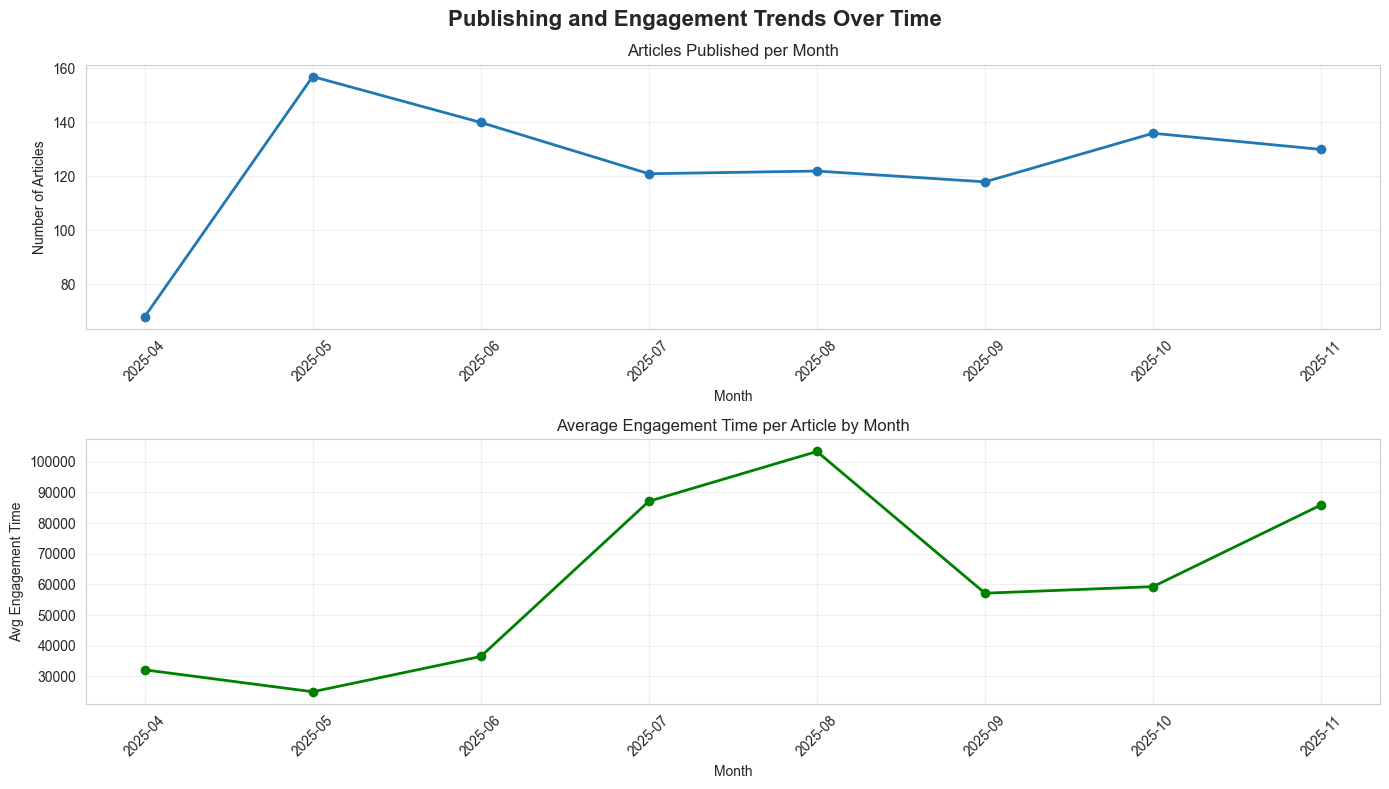

✓ Plot saved: ../../plots/publishing_engagement_trends.png


In [39]:
# Articles published over time
df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')
df['publishMonth'] = df['publishDate'].dt.to_period('M')
df['publishWeek'] = df['publishDate'].dt.to_period('W')

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Publishing and Engagement Trends Over Time', fontsize=16, fontweight='bold')

# Articles per month
articles_per_month = df.groupby('publishMonth').size()
axes[0].plot(articles_per_month.index.astype(str), articles_per_month.values, marker='o', linewidth=2)
axes[0].set_title('Articles Published per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Articles')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Average engagement over time
engagement_per_month = df.groupby('publishMonth')['totalEngagementTime'].mean()
axes[1].plot(engagement_per_month.index.astype(str), engagement_per_month.values, 
             marker='o', linewidth=2, color='green')
axes[1].set_title('Average Engagement Time per Article by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Avg Engagement Time')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{plots_dir}/publishing_engagement_trends.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Plot saved: {plots_dir}/publishing_engagement_trends.png")

## Time Series Analysis

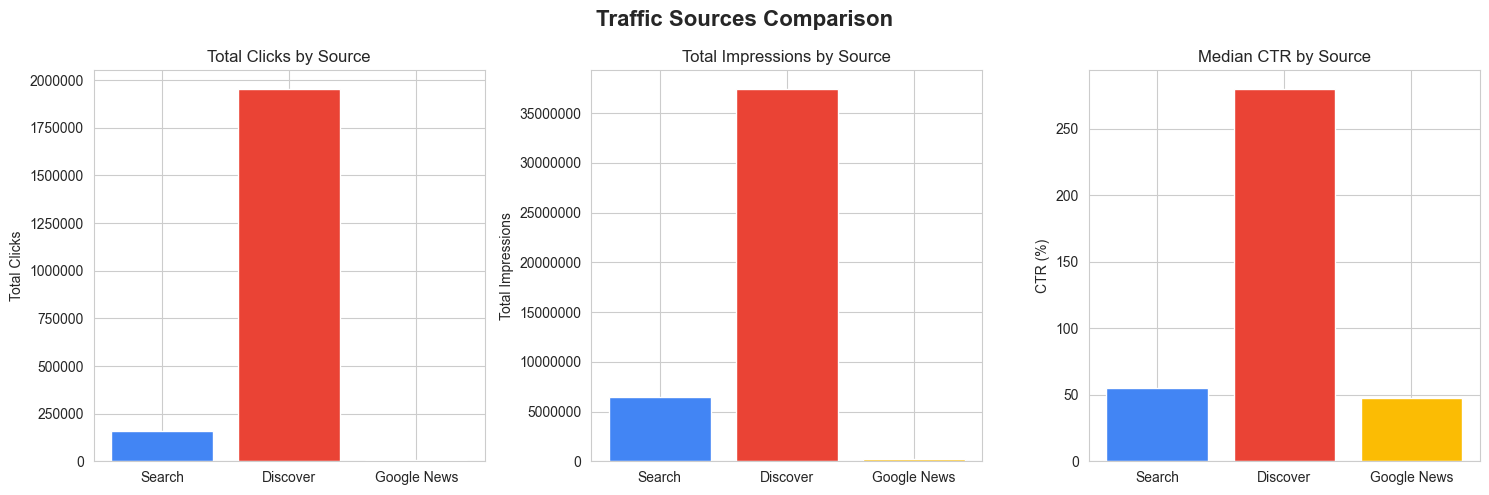


Traffic Source Summary:
------------------------------------------------------------
Search       | Clicks:    159,839 | Impressions:    6,449,738 | CTR:  2.48%
Discover     | Clicks:  1,953,664 | Impressions:   37,413,640 | CTR:  5.22%
Google News  | Clicks:      7,596 | Impressions:      255,615 | CTR:  2.97%

✓ Plot saved: ../../plots/traffic_sources_comparison.png


In [40]:
# Search vs Discover vs Google News performance comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Traffic Sources Comparison', fontsize=16, fontweight='bold')

# Clicks comparison
sources = ['searchClicks', 'discoverClicks', 'googleNewsClicks']
clicks_data = [df[col].sum() for col in sources if col in df.columns]
source_labels = ['Search', 'Discover', 'Google News']

axes[0].bar(source_labels[:len(clicks_data)], clicks_data, color=['#4285F4', '#EA4335', '#FBBC04'])
axes[0].set_title('Total Clicks by Source')
axes[0].set_ylabel('Total Clicks')
axes[0].ticklabel_format(style='plain', axis='y')

# Impressions comparison
impressions = ['searchImpressions', 'discoverImpressions', 'googleNewsImpressions']
impressions_data = [df[col].sum() for col in impressions if col in df.columns]

axes[1].bar(source_labels[:len(impressions_data)], impressions_data, color=['#4285F4', '#EA4335', '#FBBC04'])
axes[1].set_title('Total Impressions by Source')
axes[1].set_ylabel('Total Impressions')
axes[1].ticklabel_format(style='plain', axis='y')

# CTR comparison
ctr_cols = ['searchCTR', 'discoverCTR', 'googleNewsCTR']
ctr_data = [df[col].median() * 100 for col in ctr_cols if col in df.columns]

axes[2].bar(source_labels[:len(ctr_data)], ctr_data, color=['#4285F4', '#EA4335', '#FBBC04'])
axes[2].set_title('Median CTR by Source')
axes[2].set_ylabel('CTR (%)')

plt.tight_layout()
plt.savefig(f'{plots_dir}/traffic_sources_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary stats
print("\nTraffic Source Summary:")
print("-" * 60)
for source, clicks, impr in zip(source_labels, clicks_data, impressions_data):
    ctr = (clicks / impr * 100) if impr > 0 else 0
    print(f"{source:12} | Clicks: {clicks:>10,.0f} | Impressions: {impr:>12,.0f} | CTR: {ctr:>5.2f}%")
print(f"\n✓ Plot saved: {plots_dir}/traffic_sources_comparison.png")

## Search & Discovery Performance

In [41]:
# Top performing articles by engagement

print("TOP 10 ARTICLES BY ENGAGEMENT METRICS")


top_cols = ['url', 'uniqueUsers', 'pageViewsTotal', 'totalEngagementTime', 'searchClicks']
available_cols = [col for col in top_cols if col in df.columns]

print("\nBy Unique Users:")
print(df.nlargest(10, 'uniqueUsers')[available_cols].to_string(index=False))

print("\n" + "-" * 60)
print("\nBy Total Page Views:")
print(df.nlargest(10, 'pageViewsTotal')[available_cols].to_string(index=False))

TOP 10 ARTICLES BY ENGAGEMENT METRICS

By Unique Users:
                                                                                              url  uniqueUsers  pageViewsTotal  totalEngagementTime  searchClicks
                             https://www.hotnewhiphop.com/952232-air-jordan-11-285-sneaker-news-2        70399           76932           1848145.70            91
                            https://www.hotnewhiphop.com/931210-air-jordan-4-pizza-sneaker-news-2        64255           73447           1647939.56          1646
                      https://www.hotnewhiphop.com/943487-air-jordan-3-orange-citrus-sneaker-news        61335           67854           1323804.09            84
                         https://www.hotnewhiphop.com/959367-trae-young-air-jordan-3-sneaker-news        58414           64138           1487125.84           190
                      https://www.hotnewhiphop.com/940283-air-jordan-11-gamma-blue-sneaker-news-6        56319           62186        

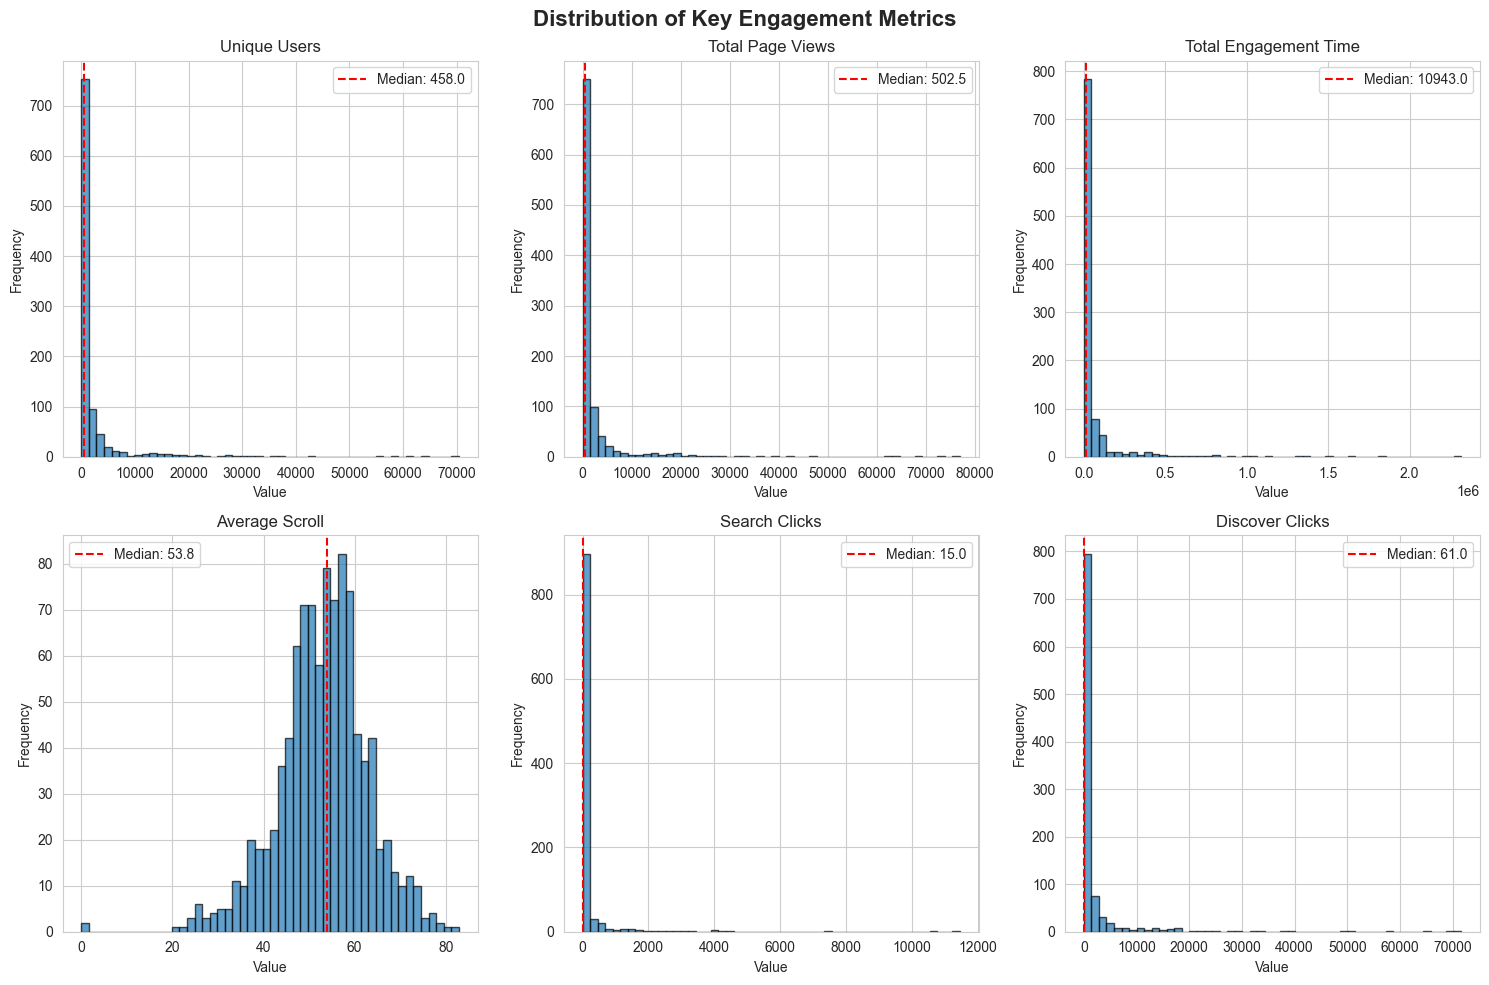

✓ Plot saved: ../../plots/engagement_metrics_distribution.png


In [42]:
# Distribution of key engagement metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Engagement Metrics', fontsize=16, fontweight='bold')

metrics = [
    ('uniqueUsers', 'Unique Users'),
    ('pageViewsTotal', 'Total Page Views'),
    ('totalEngagementTime', 'Total Engagement Time'),
    ('averageScroll', 'Average Scroll'),
    ('searchClicks', 'Search Clicks'),
    ('discoverClicks', 'Discover Clicks')
]

for idx, (col, title) in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    if col in df.columns:
        data = df[col].dropna()
        ax.hist(data, bins=50, edgecolor='black', alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.axvline(data.median(), color='red', linestyle='--', label=f'Median: {data.median():.1f}')
        ax.legend()

plt.tight_layout()
plt.savefig(f'{plots_dir}/engagement_metrics_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Plot saved: {plots_dir}/engagement_metrics_distribution.png")

## Engagement Metrics Analysis

In [43]:
# Statistical summary of numerical columns
print("Statistical Summary of Key Metrics:\n")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_cols].describe().T

Statistical Summary of Key Metrics:



,count,mean,std,min,25%,50%,75%,max
uniqueUsers,992.0,2239.571573,6294.743098,0.0,182.750000,458.000000,1337.250000,7.039900e+04
pageViewsTotal,992.0,2490.490927,7012.733830,0.0,203.000000,502.500000,1471.250000,7.693200e+04
totalEngagementTime,992.0,60829.187550,177575.891741,0.0,3822.687500,10943.025000,35987.630000,2.316990e+06
totalDuration,992.0,180477.177732,510877.013868,0.0,13598.235000,34293.175000,103659.525000,5.655045e+06
discoverImpressions,992.0,37715.362903,134446.594525,0.0,64.000000,1464.000000,15511.750000,1.673272e+06
googleNewsImpressions,992.0,257.676411,574.075934,0.0,0.000000,110.000000,251.250000,6.891000e+03
searchImpressions,992.0,6501.752016,12903.247377,0.0,1434.500000,3026.500000,6473.250000,1.918680e+05
searchClicks,992.0,161.128024,711.063842,0.0,4.000000,15.000000,57.000000,1.145400e+04
discoverClicks,992.0,1969.419355,6732.547900,0.0,2.000000,61.000000,877.250000,7.161700e+04
googleNewsClicks,992.0,7.657258,25.691476,0.0,0.000000,2.000000,7.000000,4.460000e+02


In [44]:
# Data types and missing values

print("DATA QUALITY ASSESSMENT")

print("\nData types:")
print(df.dtypes)
print("\n" + "-" * 60)
print("\nMissing values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
}).sort_values('Percentage', ascending=False)
print(missing_df)

DATA QUALITY ASSESSMENT

Data types:
url                                        object
publishDate                        datetime64[ns]
uniqueUsers                                 int64
pageViewsTotal                              int64
totalEngagementTime                       float64
totalDuration                             float64
discoverImpressions                         int64
googleNewsImpressions                       int64
searchImpressions                           int64
searchClicks                                int64
discoverClicks                              int64
googleNewsClicks                            int64
searchClicksPerArticle                      int64
searchImpressionsPerArticle                 int64
discoverClicksPerArticle                    int64
googleNewsClicksPerArticle                  int64
googleNewsImpressionsPerArticle             int64
averageScroll                             float64
averageDurationPerUser                    float64
averageRFV   

## Sneaker Brand Analysis

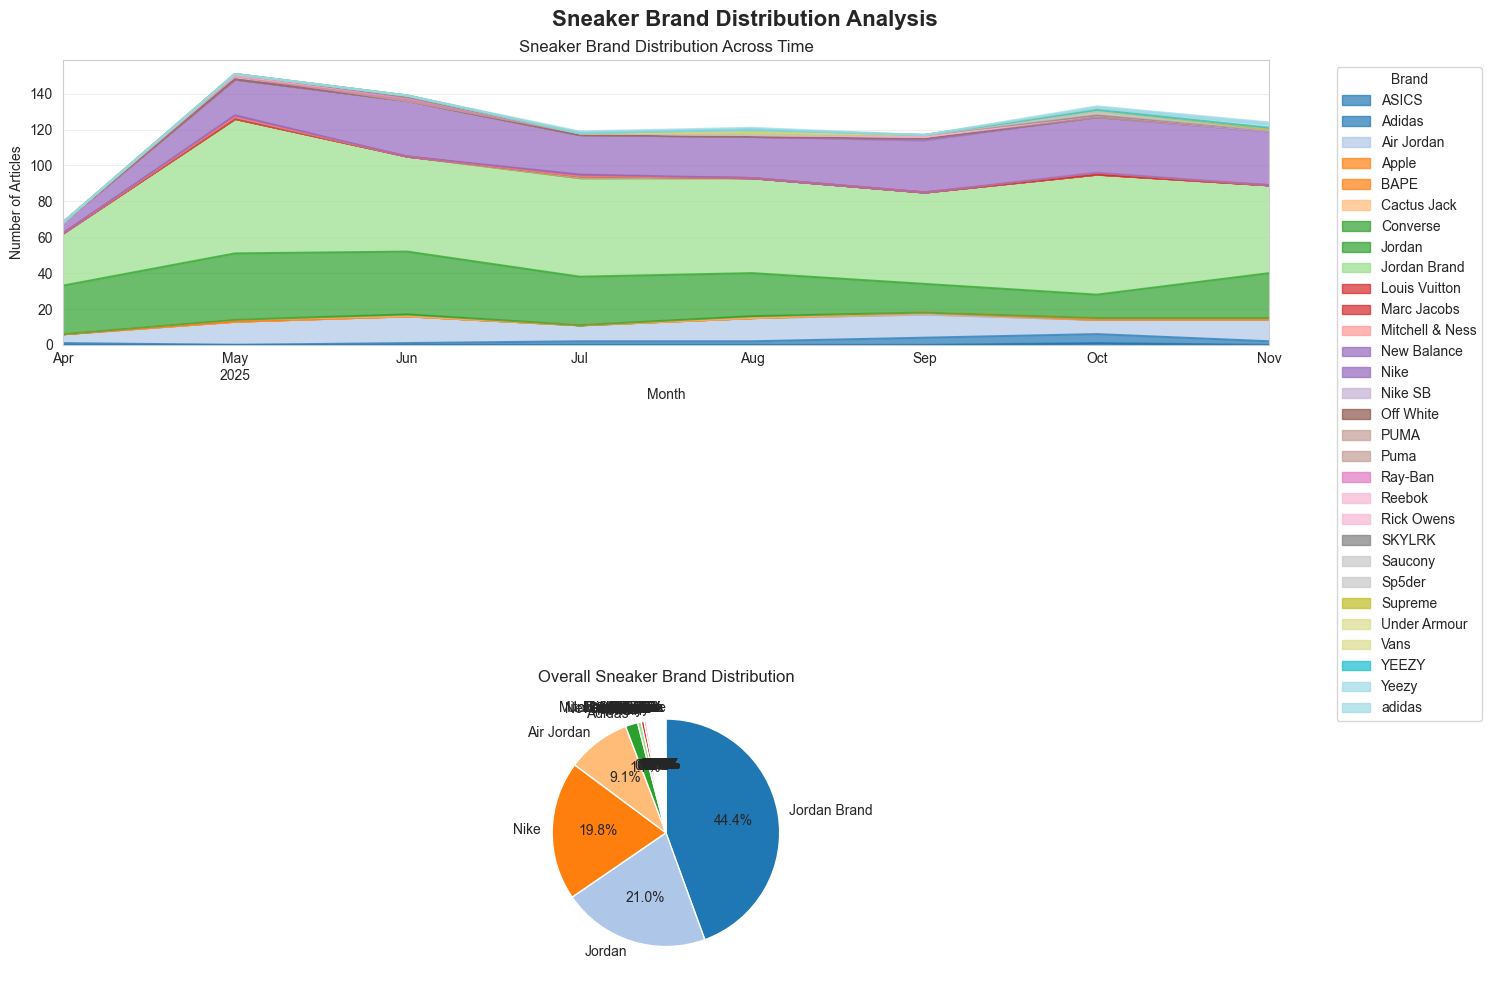


Sneaker Brand Summary:
------------------------------------------------------------
sneaker_brand
Jordan Brand       432
Jordan             204
Nike               192
Air Jordan          88
Adidas              17
PUMA                 5
adidas               4
Yeezy                3
Supreme              2
New Balance          2
Converse             2
Saucony              2
BAPE                 2
SKYLRK               1
Under Armour         1
Mitchell & Ness      1
Puma                 1
Sp5der               1
ASICS                1
Apple                1
Cactus Jack          1
Nike SB              1
Rick Owens           1
Vans                 1
YEEZY                1
Marc Jacobs          1
Louis Vuitton        1
Ray-Ban              1
Reebok               1
Off White            1
Name: count, dtype: int64

Total articles: 992
Most covered brand: Jordan Brand (432 articles, 43.5%)


In [45]:
# Load the processed dataset with sneaker brand, price, and article type columns
df_processed = pd.read_csv('../../data/hnhh_processed.csv')
df_processed['publishDate'] = pd.to_datetime(df_processed['publishDate'], errors='coerce')
df_processed['month'] = df_processed['publishDate'].dt.to_period('M')

# Distribution of sneaker brands across the year
brand_by_month = df_processed.groupby(['month', 'sneaker_brand']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Sneaker Brand Distribution Analysis', fontsize=16, fontweight='bold')

# Stacked area chart
brand_by_month.plot(kind='area', stacked=True, ax=axes[0], alpha=0.7, colormap='tab20')
axes[0].set_title('Sneaker Brand Distribution Across Time')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Articles')
axes[0].legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Overall brand distribution (pie chart)
brand_counts = df_processed['sneaker_brand'].value_counts()
colors = plt.cm.tab20(range(len(brand_counts)))
axes[1].pie(brand_counts.values, labels=brand_counts.index, autopct='%1.1f%%',
            startangle=90, counterclock=False, colors=colors)
axes[1].set_title('Overall Sneaker Brand Distribution')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSneaker Brand Summary:")
print("-" * 60)
print(brand_counts)
print(f"\nTotal articles: {len(df_processed)}")
print(f"Most covered brand: {brand_counts.index[0]} ({brand_counts.iloc[0]} articles, {brand_counts.iloc[0]/len(df_processed)*100:.1f}%)")

## Reducing the brand feature complexity:
Due to repeats in the brand column (i.e. Jordan, Air Jordan and Jordan Brand) I want to reduce this unneccesary complexity by combining the Jordan brands. I can further reduced this column's cardinality by bucketting brands with less than 5 mentions into an "Other" category

## Consolidated Brand Analysis (Combined Jordan brands, Other < 5 records)

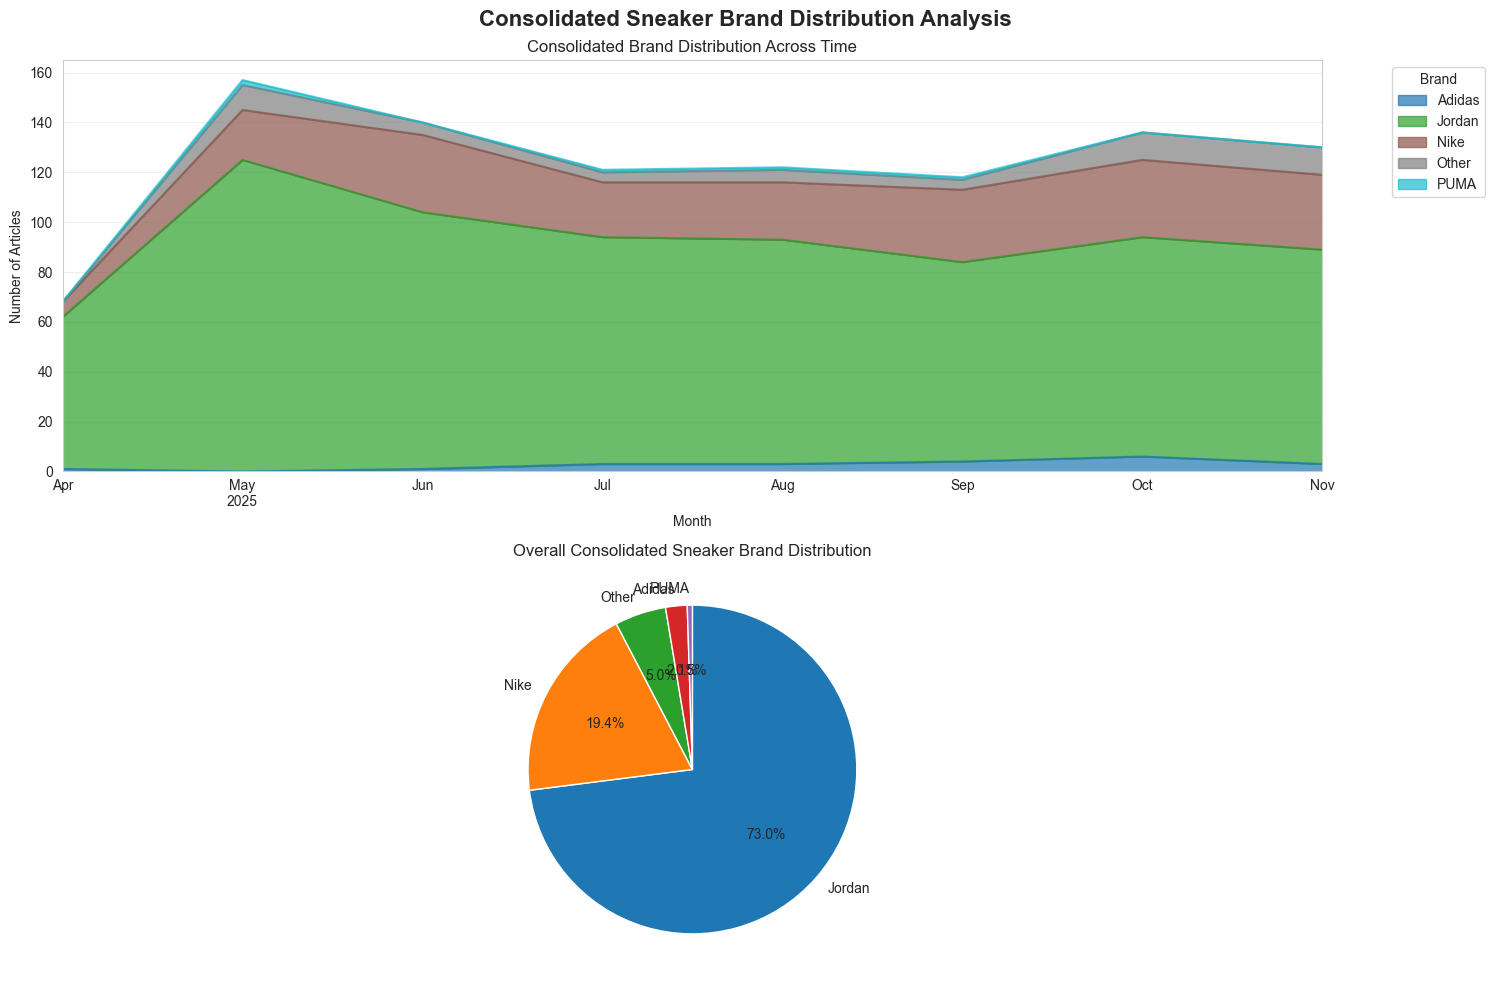


Consolidated Sneaker Brand Summary:
------------------------------------------------------------
brand_consolidated
Jordan    724
Nike      192
Other      50
Adidas     21
PUMA        5
Name: count, dtype: int64

Total articles: 992
Most covered brand: Jordan (724 articles, 73.0%)

Brands consolidated:
  • Jordan Brand + Jordan + Air Jordan → Jordan
  • adidas + Adidas → Adidas
  • 23 brands with <5 articles → Other

✓ Plot saved: ../../plots/consolidated_brand_distribution.png


In [46]:
# Create a consolidated brand column
df_consolidated = df_processed.copy()

# Combine Jordan Brand, Jordan, and Air Jordan into one category
df_consolidated['brand_consolidated'] = df_consolidated['sneaker_brand'].replace({
    'Jordan Brand': 'Jordan',
    'Air Jordan': 'Jordan'
})

# Combine adidas variations (case sensitivity)
df_consolidated['brand_consolidated'] = df_consolidated['brand_consolidated'].replace({
    'adidas': 'Adidas'
})

# Create 'Other' category for brands with less than 5 records
brand_counts = df_consolidated['brand_consolidated'].value_counts()
brands_to_keep = brand_counts[brand_counts >= 5].index
df_consolidated.loc[~df_consolidated['brand_consolidated'].isin(brands_to_keep), 'brand_consolidated'] = 'Other'

# Distribution of consolidated sneaker brands across the year
brand_by_month_consolidated = df_consolidated.groupby(['month', 'brand_consolidated']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Consolidated Sneaker Brand Distribution Analysis', fontsize=16, fontweight='bold')

# Stacked area chart
brand_by_month_consolidated.plot(kind='area', stacked=True, ax=axes[0], alpha=0.7, colormap='tab10')
axes[0].set_title('Consolidated Brand Distribution Across Time')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Articles')
axes[0].legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Overall brand distribution (pie chart)
brand_counts_consolidated = df_consolidated['brand_consolidated'].value_counts()
colors = plt.cm.tab10(range(len(brand_counts_consolidated)))
axes[1].pie(brand_counts_consolidated.values, labels=brand_counts_consolidated.index, autopct='%1.1f%%',
            startangle=90, counterclock=False, colors=colors)
axes[1].set_title('Overall Consolidated Sneaker Brand Distribution')

plt.tight_layout()
plt.savefig(f'{plots_dir}/consolidated_brand_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nConsolidated Sneaker Brand Summary:")
print("-" * 60)
print(brand_counts_consolidated)
print(f"\nTotal articles: {len(df_consolidated)}")
print(f"Most covered brand: {brand_counts_consolidated.index[0]} ({brand_counts_consolidated.iloc[0]} articles, {brand_counts_consolidated.iloc[0]/len(df_consolidated)*100:.1f}%)")
print(f"\nBrands consolidated:")
print("  • Jordan Brand + Jordan + Air Jordan → Jordan")
print("  • adidas + Adidas → Adidas")
print(f"  • {len(brand_counts[brand_counts < 5])} brands with <5 articles → Other")
print(f"\n✓ Plot saved: {plots_dir}/consolidated_brand_distribution.png")

## Correlation Matrix: Page Views, Brand, Price, and Article Type

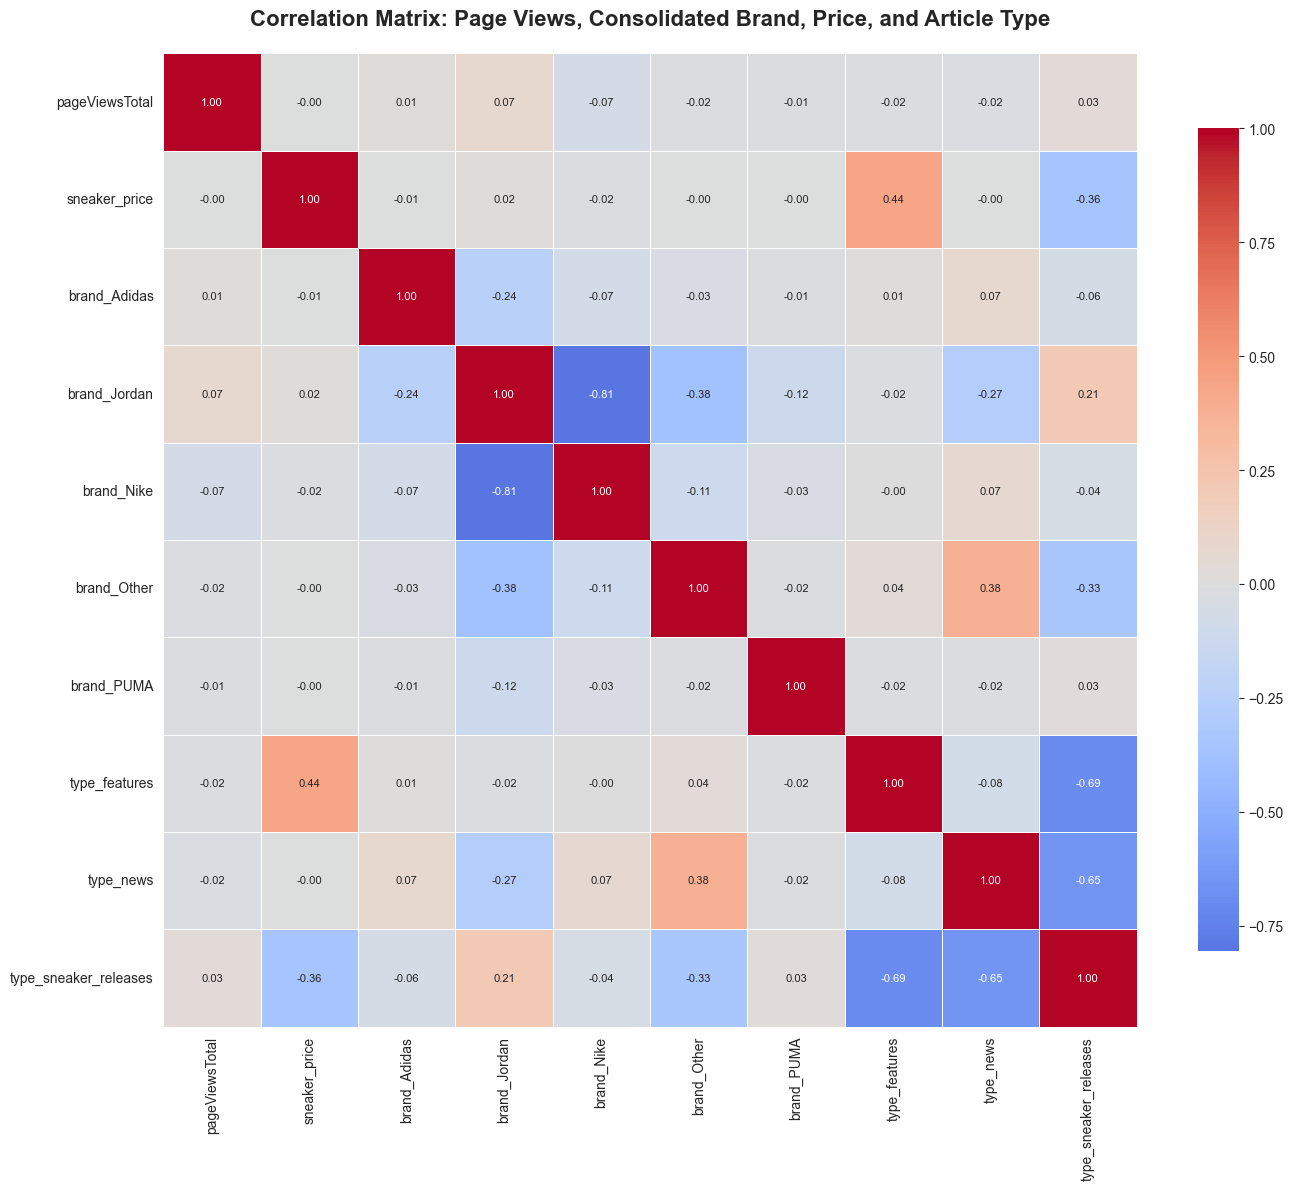

✓ Plot saved: ../../plots/consolidated_brand_correlation_matrix.png


In [47]:
# Create correlation matrix for page views, sneaker brand, sneaker price, and article type
# Using consolidated brands

# Encode categorical variables (brand_consolidated and article_type)
brand_encoded = pd.get_dummies(df_consolidated['brand_consolidated'], prefix='brand')
article_type_encoded = pd.get_dummies(df_consolidated['article_type'], prefix='type')

# Combine with numerical columns
correlation_df = pd.concat([
    df_consolidated[['pageViewsTotal', 'sneaker_price']].copy(),
    brand_encoded,
    article_type_encoded
], axis=1)

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Create visualization
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})
plt.title('Correlation Matrix: Page Views, Consolidated Brand, Price, and Article Type', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{plots_dir}/consolidated_brand_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ Plot saved: {plots_dir}/consolidated_brand_correlation_matrix.png")

## Lack of Significant Correlation:
It seeems like there's a lack of significant correlation between the GPT enriched features and view count (my prospective response var). As I revisit this project down the line I'll want to add more features, specifically some features that might indicate the momentum of interest in a given topic. Such as, # of tweets in preceeding week or change in StockX shoe price week before.